In [19]:

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import torch

from detectron2.utils.visualizer import ColorMode

import random


In [20]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import os
import numpy as np
import json
from detectron2.structures import BoxMode


def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    display(img)
    '''plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    #img = transforms.ToPILImage(img)
    #plt.show(img)
    '''


In [21]:
######################################################################################
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str, default=None)

parser.add_argument('--model_dir', type=str, default=None)

parser.add_argument('-f')
args = parser.parse_args()
######################################################################################


# data_path = args.data_dir

data_path = '/root/notebooks/final/caltech_origin_data_refine/'

#data_path = '/root/notebooks/final/caltech_origin_mask8_42000/'

model_dir = '/root/notebooks/final/detectron2_out_part6_100r0g/'


In [34]:
import csv

def take_path(path):
    tmp = []
    for json_number in tqdm(sorted(os.listdir(path))):
        if json_number == '.ipynb_checkpoints':
            pass
        else: tmp.append(os.path.join(path, json_number))
    return tmp
    

data_pathlist_json = take_path(data_path+'street_json/')

# data_pathlist_json = data_pathlist_json[:num_of_data]
    
train_people_jsonlist = data_pathlist_json
random.shuffle(train_people_jsonlist)
train_people_imagelist = [i.replace('street_json', 'street').replace('/json/', '/output/').replace('.json', '.jpg') for i in train_people_jsonlist]


100%|██████████| 110913/110913 [00:00<00:00, 600255.53it/s]


In [35]:
train_people_imagelist = train_people_imagelist[:1000]
train_people_jsonlist = train_people_jsonlist[:1000]

In [36]:
def get_pedestrain_dict(image_list, json_list):
    dataset_dicts = []
    
    for i,path in tqdm(enumerate(image_list)):
        filename = path
        #img = cv2.imread(path)
        # height, width = cv2.imread(filename).shape[:2]
        record = {}
        record['file_name'] = filename
        #record['file_img'] = img
        record['image_id'] = i #path.split('/')[-1][:-5]
        #id is like 000000 or 000001
        record['height']= 480
        record['width']= 640
        
        #for i in data_list[1] to get bbox and category
        objs = []
        
        people = json_list[i]
        with open(people) as p:
            json_context = json.load(p)
            for person in json_context:
                boxes = list(map(float, person['pos']))
                obj = {
                    "bbox": boxes,
                    "bbox_mode": BoxMode.XYWH_ABS,
                    #"segmentation": [poly], To draw a line, along to ballon
                    "category_id": 0,
                    "iscrowd": 0
                }
                objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts #list of dicts

In [37]:
dataset_dicts = get_pedestrain_dict(train_people_imagelist, train_people_jsonlist)

1000it [00:01, 594.99it/s]


In [38]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("Base-RCNN-FPN.yaml"))
cfg.DATALOADER.NUM_WORKERS = 4
#cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER =  126000   # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
# cfg.OUTPUT_DIR = '/home/tedbest2/Desktop/repo/detectron2_output/baseline_FPN_final_v2'


In [39]:
cfg.MODEL.WEIGHTS = os.path.join(model_dir, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


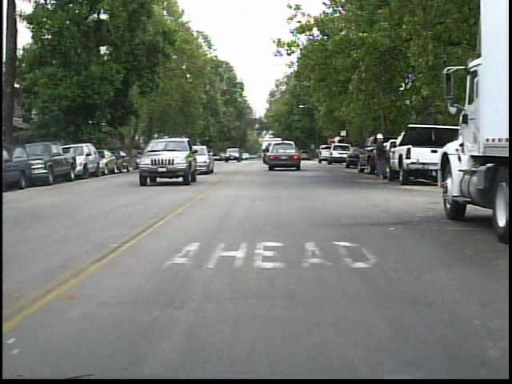

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


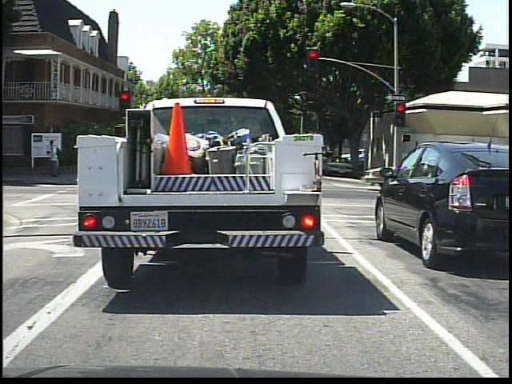

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


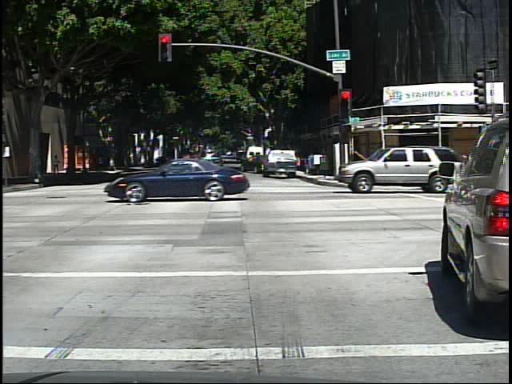

tensor([0, 0, 0], device='cuda:0')
Boxes(tensor([[610.8594, 173.6970, 637.8063, 249.4193],
        [255.5515, 183.9730, 269.8230, 226.1353],
        [451.0544, 176.5211, 481.8038, 212.2451]], device='cuda:0'))


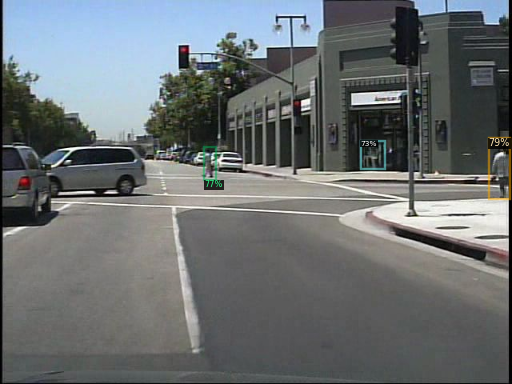

tensor([0], device='cuda:0')
Boxes(tensor([[399.4572, 170.1634, 415.6159, 202.3276]], device='cuda:0'))


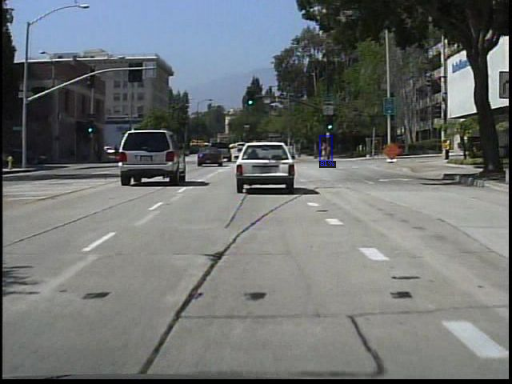

tensor([0, 0], device='cuda:0')
Boxes(tensor([[ 45.2755, 193.0251,  58.8534, 227.7194],
        [ 24.4611, 193.9465,  38.6409, 225.7730]], device='cuda:0'))


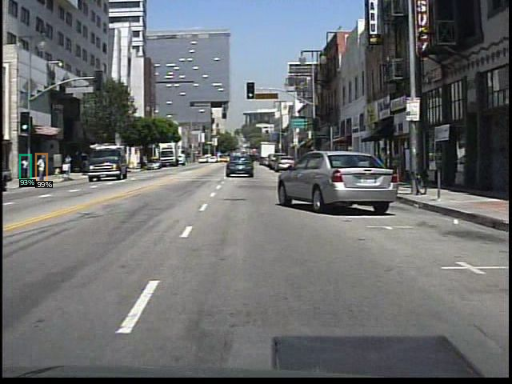

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


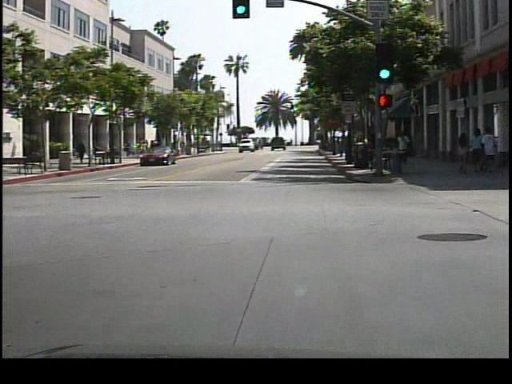

tensor([0, 0], device='cuda:0')
Boxes(tensor([[  9.8481, 156.7986, 134.9623, 237.7792],
        [ 57.2668, 171.0415,  91.6598, 229.9173]], device='cuda:0'))


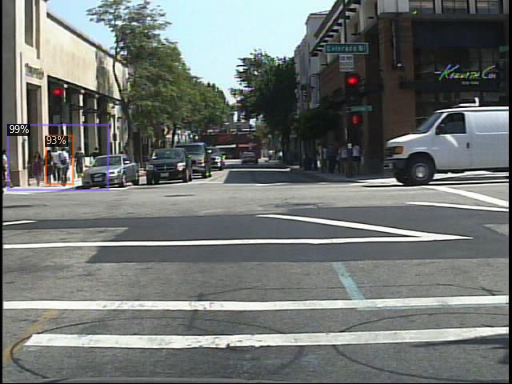

tensor([], device='cuda:0', dtype=torch.int64)
Boxes(tensor([], device='cuda:0', size=(0, 4)))


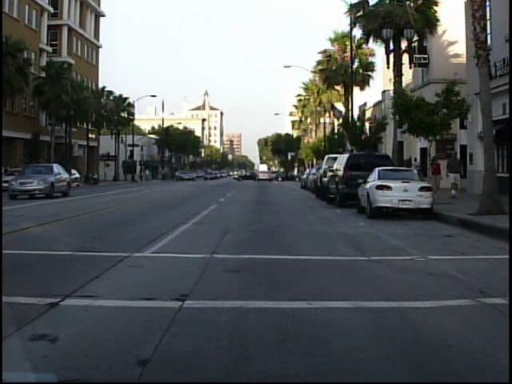

tensor([0, 0], device='cuda:0')
Boxes(tensor([[116.3808, 183.6508, 131.3710, 214.9822],
        [514.7098, 173.5361, 528.5978, 201.6159]], device='cuda:0'))


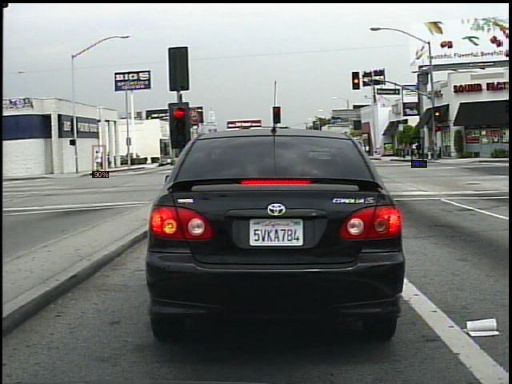

In [41]:
for d in random.sample(dataset_dicts, 10):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im,
                   #metadata=pedestrain_metadata, 
                   scale=0.8,
                   instance_mode =  ColorMode.IMAGE
        )
                   # remove the colors of unsegmented pixels
    print(outputs['instances'].pred_classes)
    print(outputs["instances"].pred_boxes)

    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image())